#### Задача 1
Постройте график.  
Назовите график.  
Сделайте именование оси x и оси y.  
Сделайте выводы.  

1.1. Изучите стоимости недвижимости.  

1.2. Изучите распределение квадратуры жилой.  

1.3. Изучите распределение года постройки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc-house-data.csv')

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


##### 1.1. Изучите стоимости недвижимости.

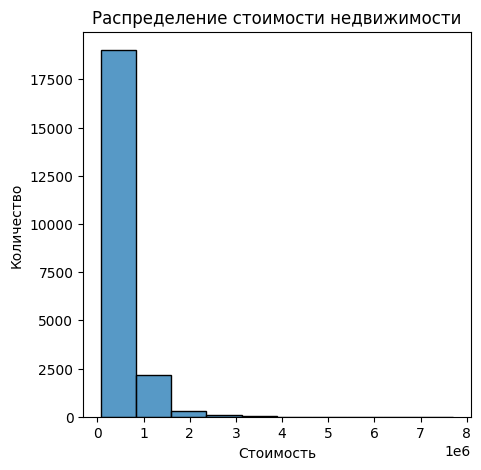

In [4]:
plt.figure(figsize=(5, 5))
sns.histplot(df['price'], bins=10)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

##### 1.2. Изучите распределение квадратуры жилой.

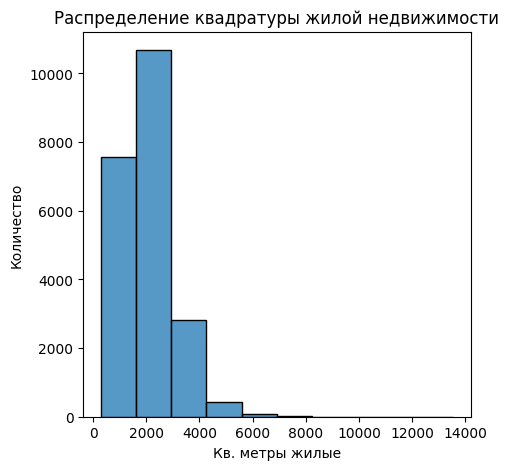

In [5]:
plt.figure(figsize=(5, 5))
sns.histplot(df['sqft_living'], bins=10)
plt.title('Распределение квадратуры жилой недвижимости')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество');

##### 1.3. Изучите распределение года постройки.

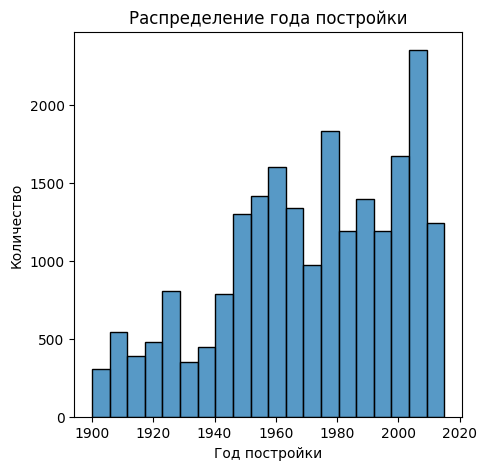

In [6]:
plt.figure(figsize=(5, 5))
sns.histplot(df['yr_built'], bins=20)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

#### Задача 2
2.1. Изучите распределение домов от наличия вида на набережную.  
Постройте график.  
Сделайте выводы.  

2.2. Изучите распределение этажей домов.  

2.2. Изучите распределение состояния домов.

2.1. Изучите распределение домов от наличия вида на набережную.

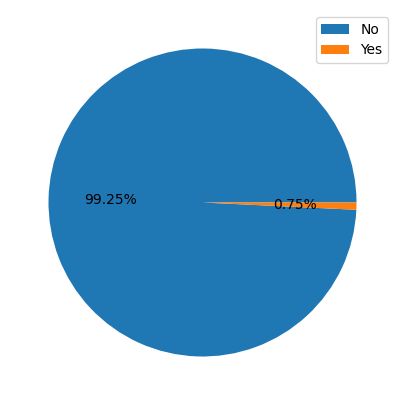

In [7]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(data, autopct='%.2f%%')
plt.legend(['No', 'Yes']);

2.2. Изучите распределение этажей домов.  

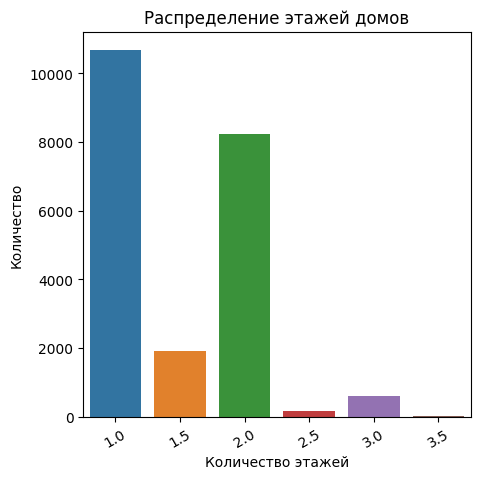

In [8]:
data = df['floors'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x = data.index, y = data)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество')
plt.xticks(rotation=30);

#### 2.2. Изучите распределение состояния домов.

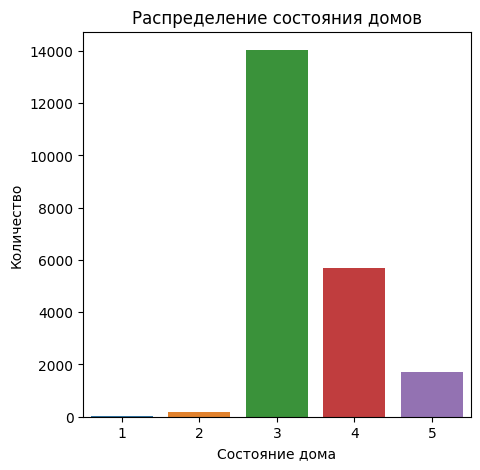

In [9]:
data_c = df['condition'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x = data_c.index, y = data_c)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество');

#### Задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Изучив типы данных исследуемой таблицы, видим, что все значения всех признаков, кроме полей признака date имеют числовые типы.  
Вместо признака date введем признак даты продажи дома числового типа (год продажи).  
Признак date удалим.

In [11]:
df['year_of_sale'] = df['date'].apply(lambda x: x[:4]).astype(int)
df.drop(columns='date', inplace=True)

df.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015


Поробуем найти признаки изменение которых имеет линейную зависимость с изменением стоимости дома.  
Для удобства буду использовать формат для анализа - тепловую карту.

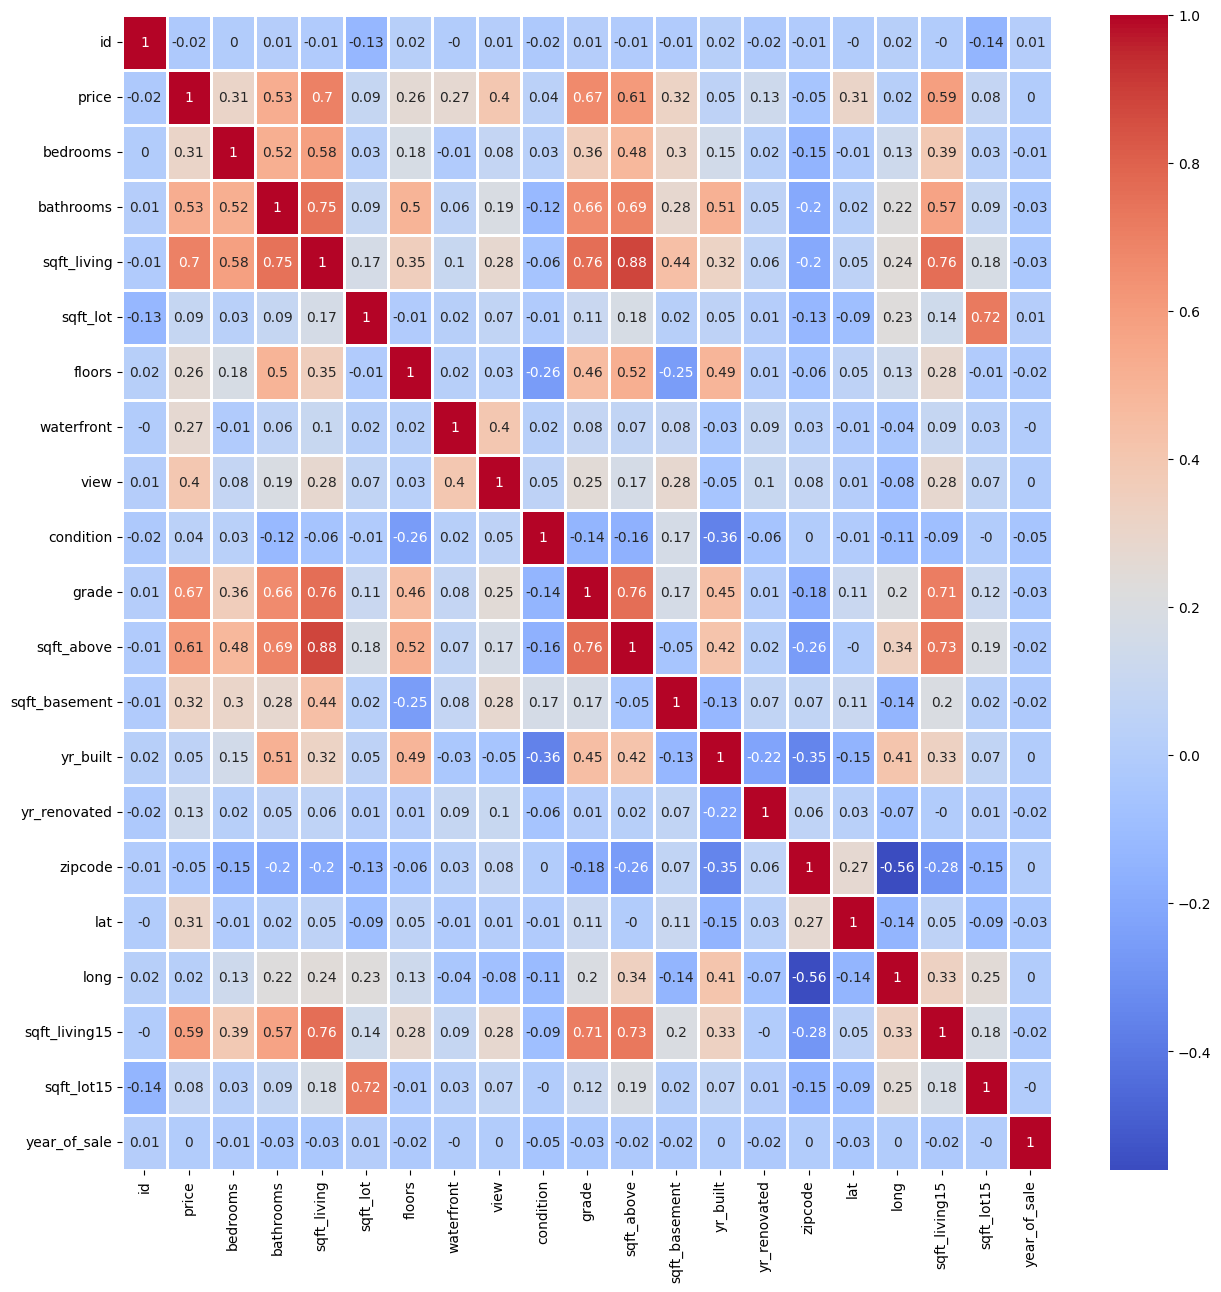

In [12]:
corr_matrix = df.corr().round(2)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm');

Признаки, значения корреляции которых со стоимостью дома выше 0,3, отразил ниже в виде столбчатой диаграммы.  
У всех признаков прямая корреляция со стоимостью дома. Т.е. при увеличении значения признака, в определенной степени увеличивается стоимость дома.  

Признак с наименьше значимой прямой корреляцией со стоимостью дома: bedrooms - 'Кол-во спален'.  
Признак с наибольшей значимой прямой корреляцией со стоимостью дома: sqft_living - 'Кв. метры жилые'.
 

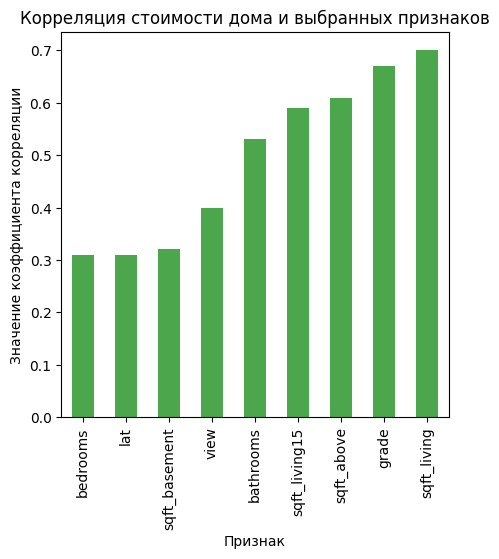

In [13]:

data_ser = pd.Series(data=[df['price'].corr(df['bedrooms']), df['price'].corr(df['bathrooms']), df['price'].corr(df['sqft_living']), df['price'].corr(df['view']), df['price'].corr(df['grade']), 
                          df['price'].corr(df['sqft_above']), df['price'].corr(df['sqft_basement']), df['price'].corr(df['lat']), df['price'].corr(df['sqft_living15'])],
                     index=['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']). round(2).sort_values()

plt.figure(figsize=(5, 5))
data_ser.plot.bar(color='g', alpha=0.7)
plt.title('Корреляция стоимости дома и выбранных признаков')
plt.xlabel('Признак')
plt.ylabel('Значение коэффициента корреляции');

Построим графики взаимных распределений не имеющих линейные зависимости.

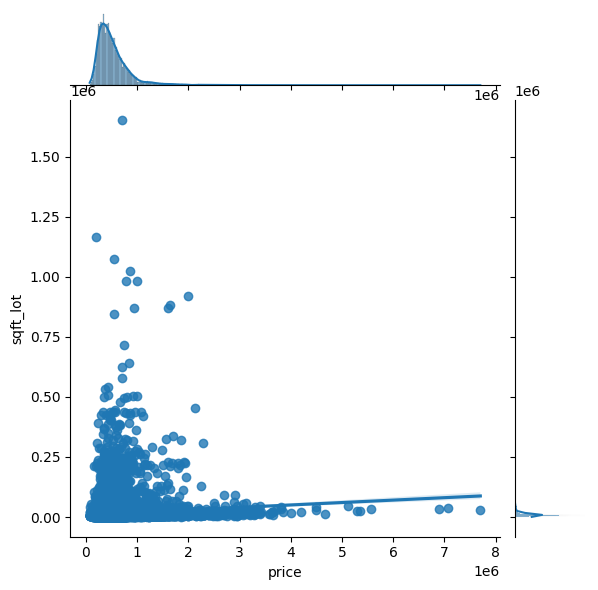

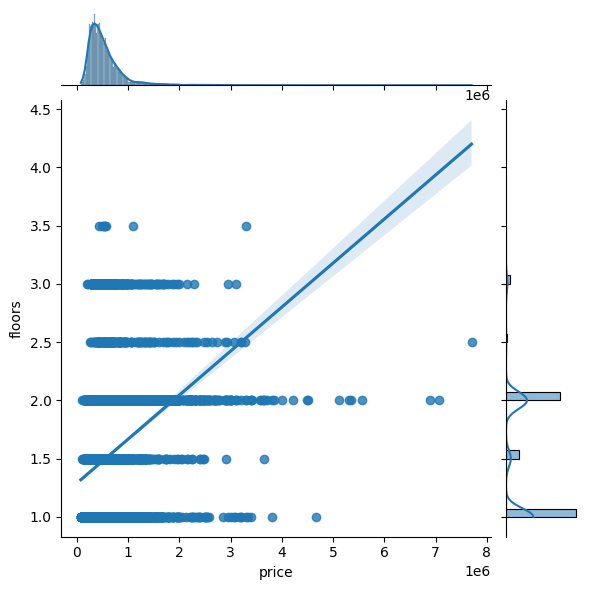

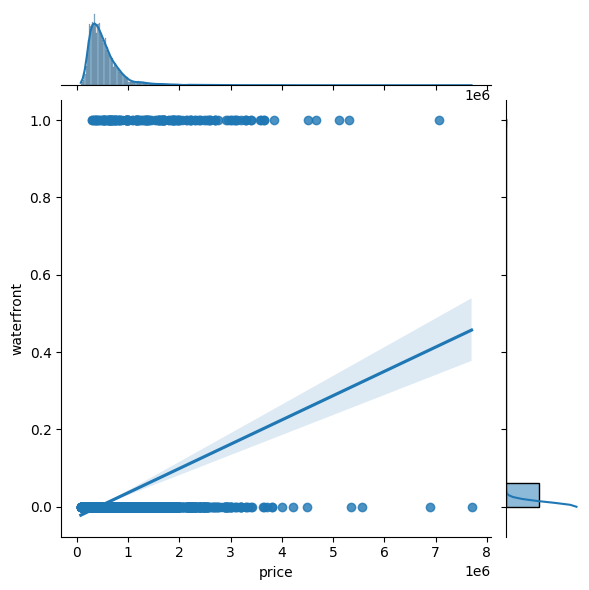

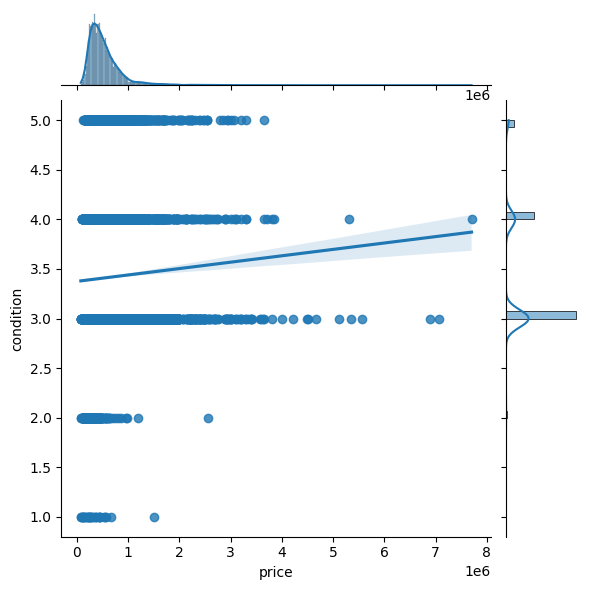

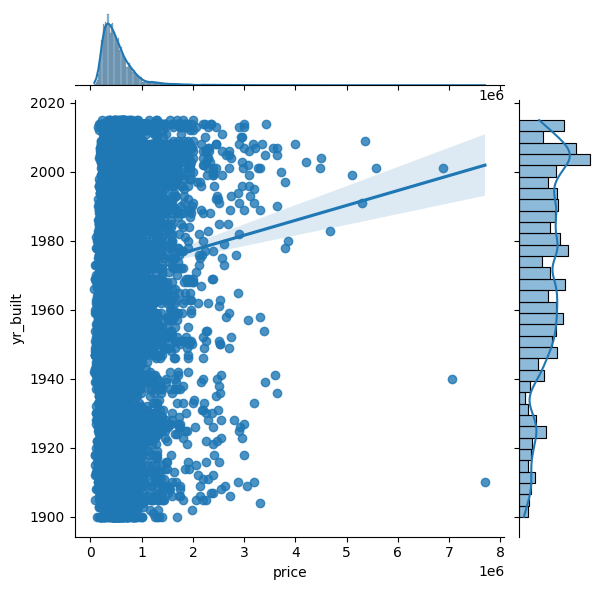

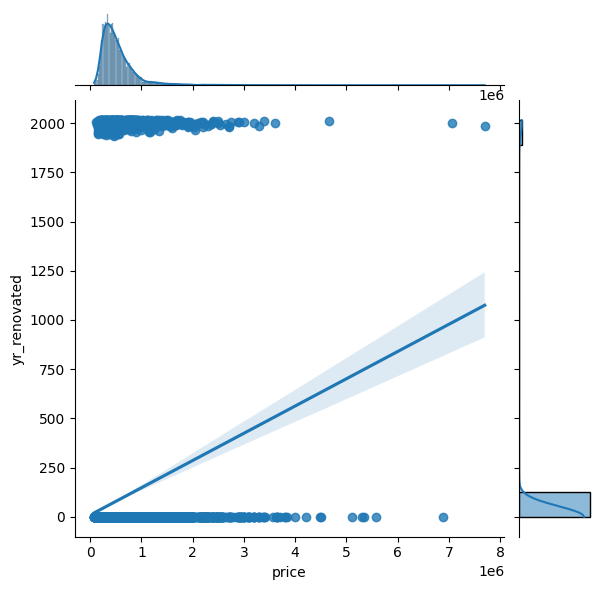

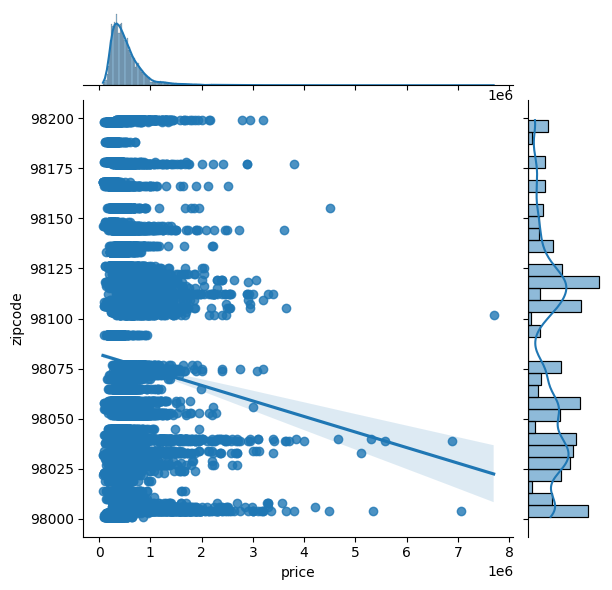

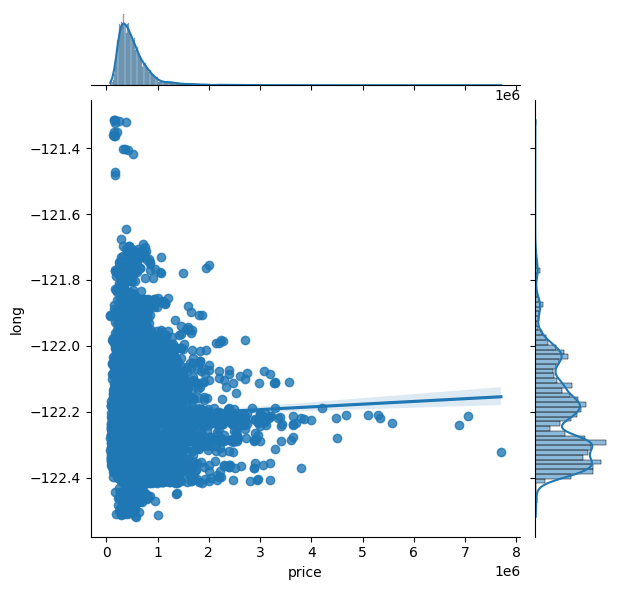

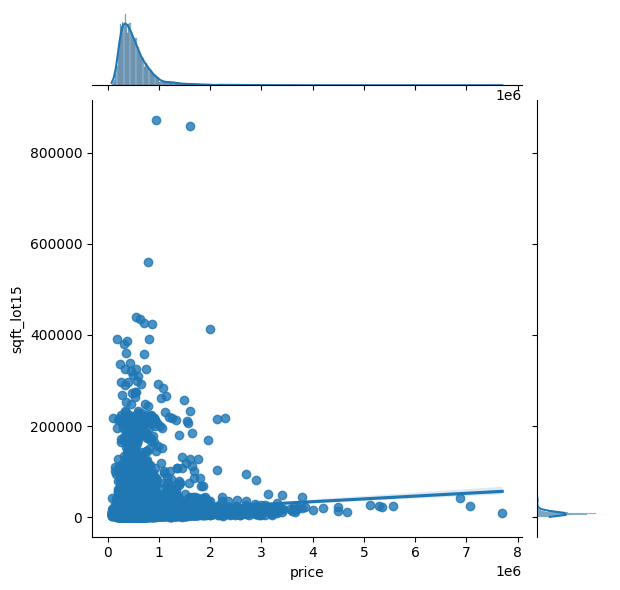

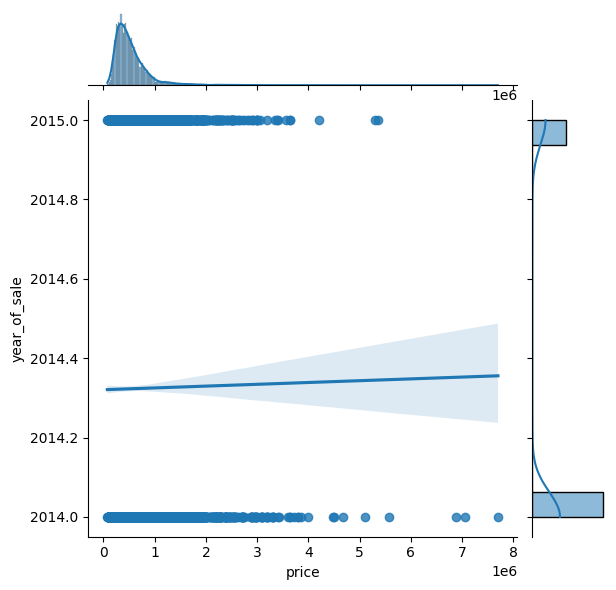

In [14]:
for i in df:
    if i not in ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']:
        sns.jointplot(x=df['price'], y=df[i], kind='reg');

Из графиков видно, что явно на цену эти признаки не влияют.  
Как вариант, можно сгруппировать дома по категорийным признакам и внутри каждой категории пересмотреть влияние остальных признаков на цену.  
Из построенных графиков видим, какие признаки можно взять как категорийные (на оси ординат они представлены явно ограниченным выбором).  
  
Например:  
floors - Кол-во этажей;  
waterfront - Есть набержная или нет;  
condition - Значение от 1 до 5 насколько хорошее состояние;  
year_of_sale - Год продажи.


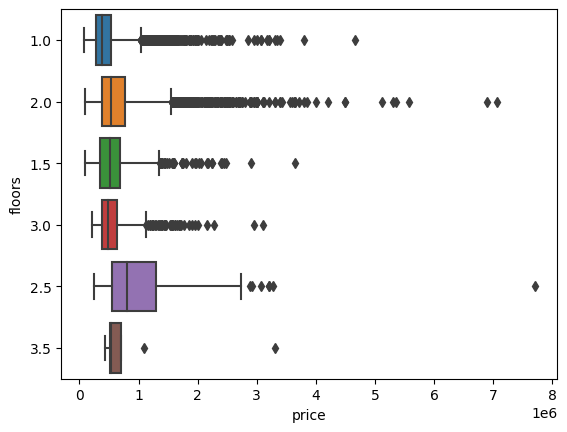

In [18]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=2);

Получается, что дома с количеством этажей '2.5' обычно самые дорогие.  
В других случаях тоже есть дома по схожей цене и выше, но это исключения.

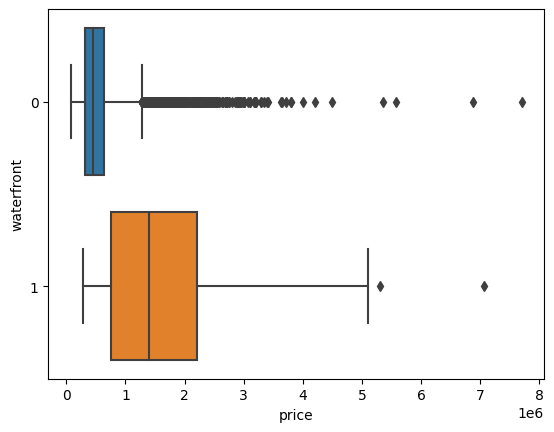

In [19]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=2);

Наличие набережной увеличивает стоимость дома, но есть исключения.

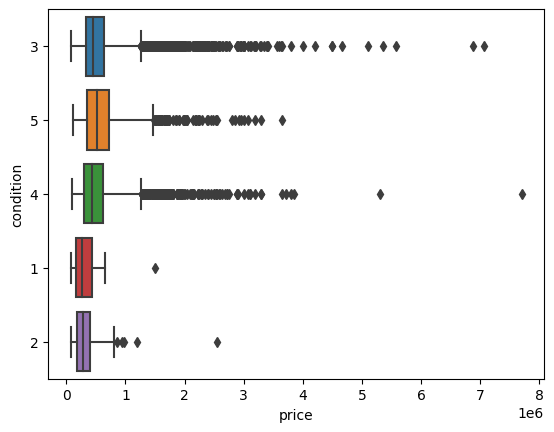

In [20]:
sns.boxplot(x=df['price'], y=df['condition'].astype('str'), whis=2);

Состояние дома оказывает влияние на стоимость дома. Причем для домов с плохим состоянием практически нет домов со стоимостью не укладывающиюся в распределение ('выбросов').

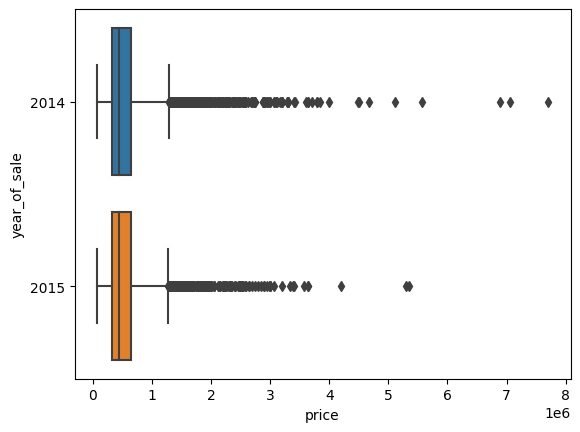

In [21]:
sns.boxplot(x=df['price'], y=df['year_of_sale'].astype('str'), whis=2);

Видим, что год продажи не влияет на стоимость дома.

**На примере группы домов с набережной и без набережной рассмотрим признаки и их степень влияния на стоимость домов.**  
  
  
Попробуем найти признаки с линейной зависимостью от стоимости дома для домов у которых есть набережная.

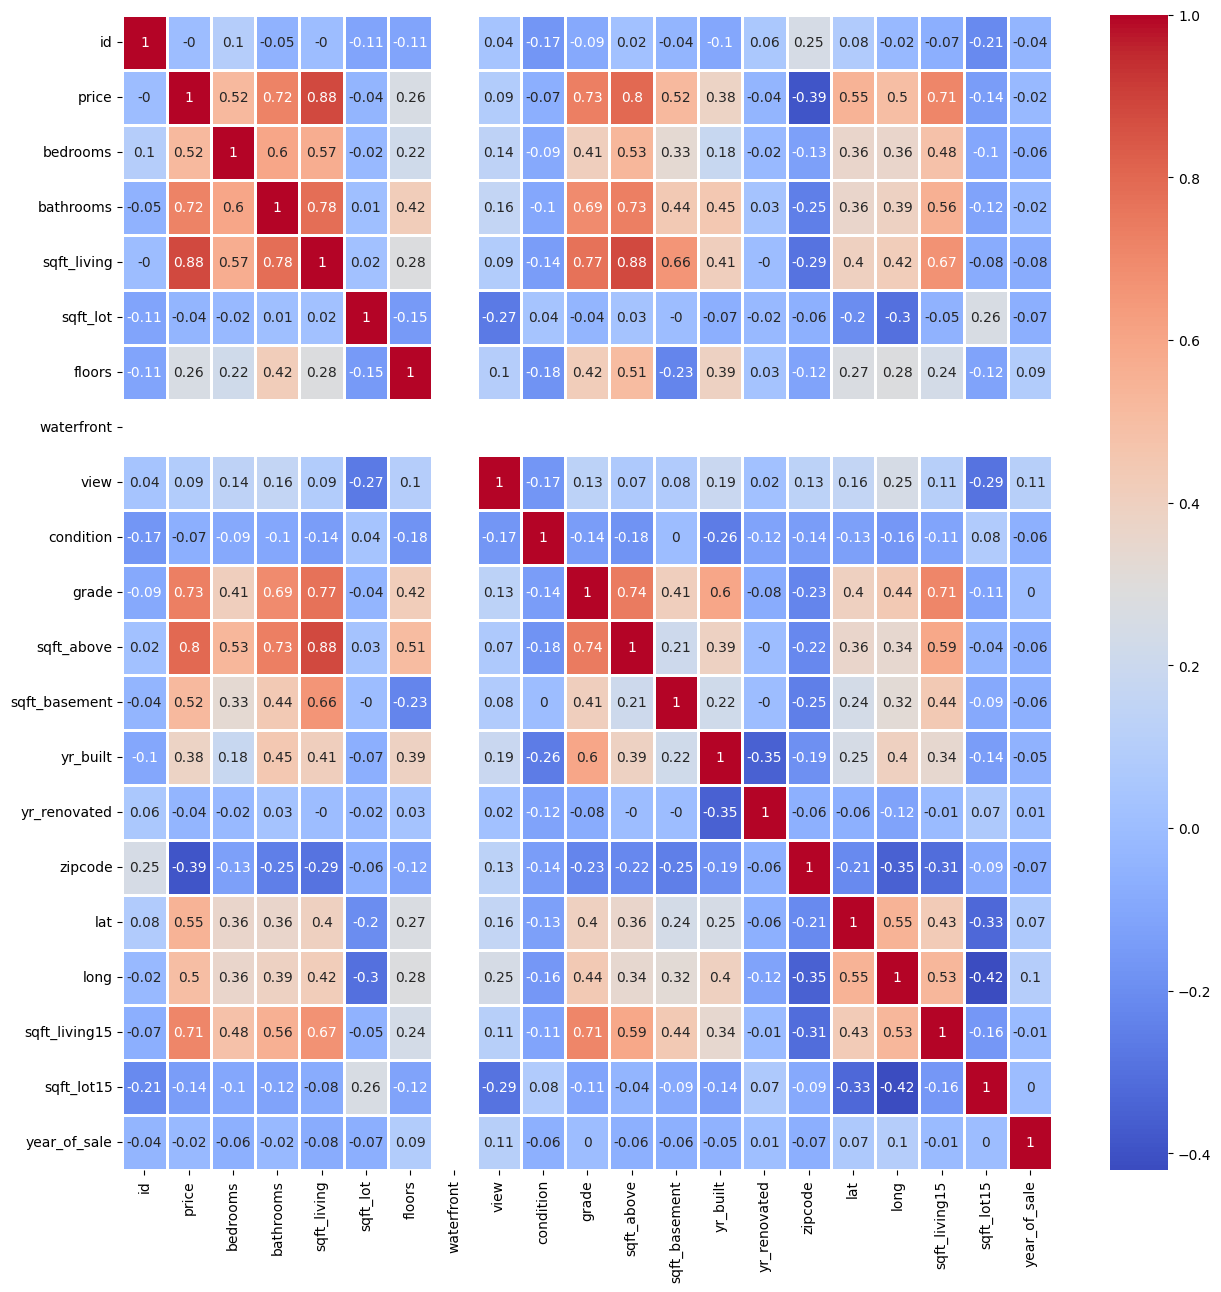

In [24]:
corr_matrix_waterfront = df[df['waterfront'] == 1].corr().round(2)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_waterfront, annot=True, linewidths=1, cmap='coolwarm');

Признаки, значения корреляции которых со стоимостью дома выше 0,3:  
- с прямой линейной зависимостью:
    - 0,52 - bedrooms - Кол-во спален.
    - 0,72 - bathrooms - Кол-во ванных комнат (0.5 - туалет без душа).
    - 0,88 - sqft_living - Кв. метры жилые.
    - 0,73 - grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна.
    - 0,8 - sqft_above - Кв. метры дома, которые находятся выше земли.
    - 0,52 - sqft_basement - Кв. метры дома, которые находятся ниже земли.
    - 0,38 - yr_built - Год постройки дома.
    - 0,55 - lat - Широта.
    - 0,5 - long - Долгота.
    - 0,71 - sqft_living15 - Кв. метры жилой площади у 15 соседей.

- с обратной линейной зависимостью (т.е. чем больше значение признака, тем меньше стоимость дома):
    - -0,39 - zipcode - Индекс.  
    
**Как наиболее влияющие признаки на стоимость дома выберем со значение коэффициента корреляции больше 0,7:**
- 'Кол-во ванных комнат'.
- 'Кв. метры жилые'.
- 'Качество конструкции и дизайна'.
- 'Кв. метры дома, которые находятся выше земли'.
- 'Кв. метры жилой площади у 15 соседей'.

Для домов у которых нет набережной набор признаков линейно влияющих на стоимость дома и степерь влияния будет уже другой.

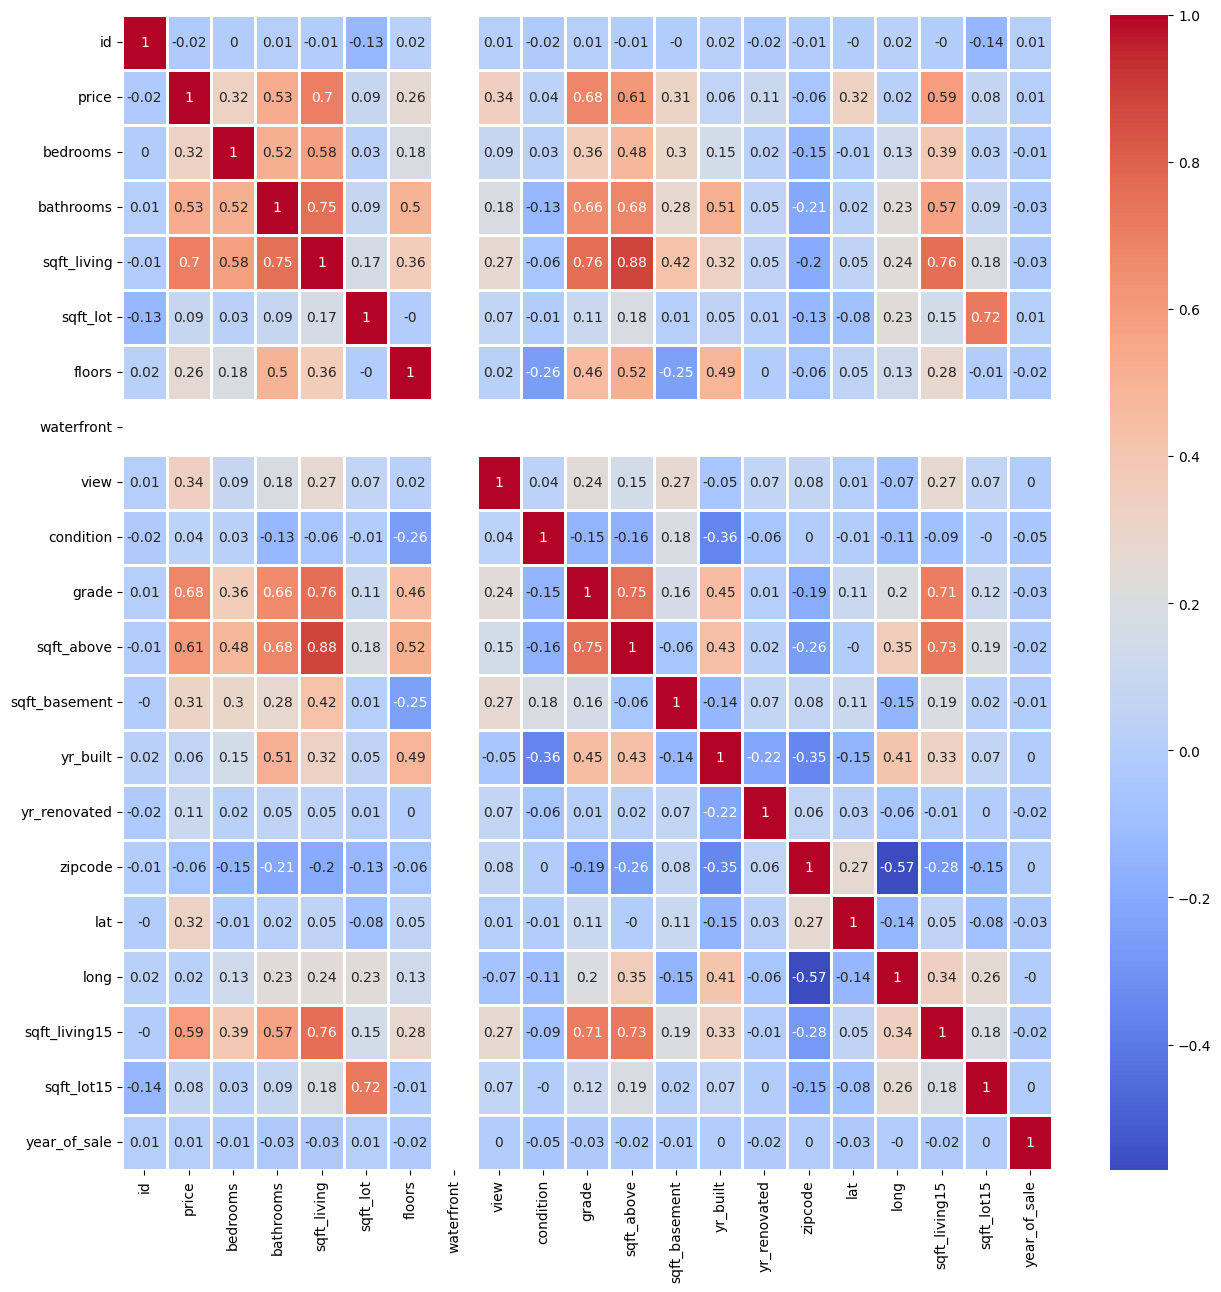

In [28]:
corr_matrix_waterfront = df[df['waterfront'] == 0].corr().round(2)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_waterfront, annot=True, linewidths=1, cmap='coolwarm');

Признаки, значения корреляции которых со стоимостью дома выше 0,3 с прямой линейной зависимостью:
- 0,32 - bedrooms - Кол-во спален.
- 0,53 - bathrooms - Кол-во ванных комнат (0.5 - туалет без душа).
- 0,7 - sqft_living - Кв. метры жилые.
- 0,34 - view - Значение от 0 до 4 насколько хороший вид.
- 0,68 - grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна.
- 0,61 - sqft_above - Кв. метры дома, которые находятся выше земли.
- 0,31 - sqft_basement - Кв. метры дома, которые находятся ниже земли.
- 0,32 - lat - Широта.
- 0,59 - sqft_living15 - Кв. метры жилой площади у 15 соседей.  

**Как наиболее влияющие признаки на стоимость дома выберем со значение коэффициента корреляции больше 0,7:**
- 0,7 - sqft_living - Кв. метры жилые.

**Сравнивая эти две группы домов между собой можно сказать, что для домов у которых есть набережная, количество признаком и степень их влияния на увеличение стоимости жилья больше, чем у домов без набережной.**
